Implement multivariate regression to predict car prices based on several features.
Explore the relationships between features and car prices.
Evaluate the model’s accuracy and tune it for optimal performanc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
numerics = df.select_dtypes(include=['int64', 'float64'])
categoricals = df.select_dtypes(include=['object']).columns.to_list()
cat_var = pd.get_dummies(df, drop_first=True)

<Axes: >

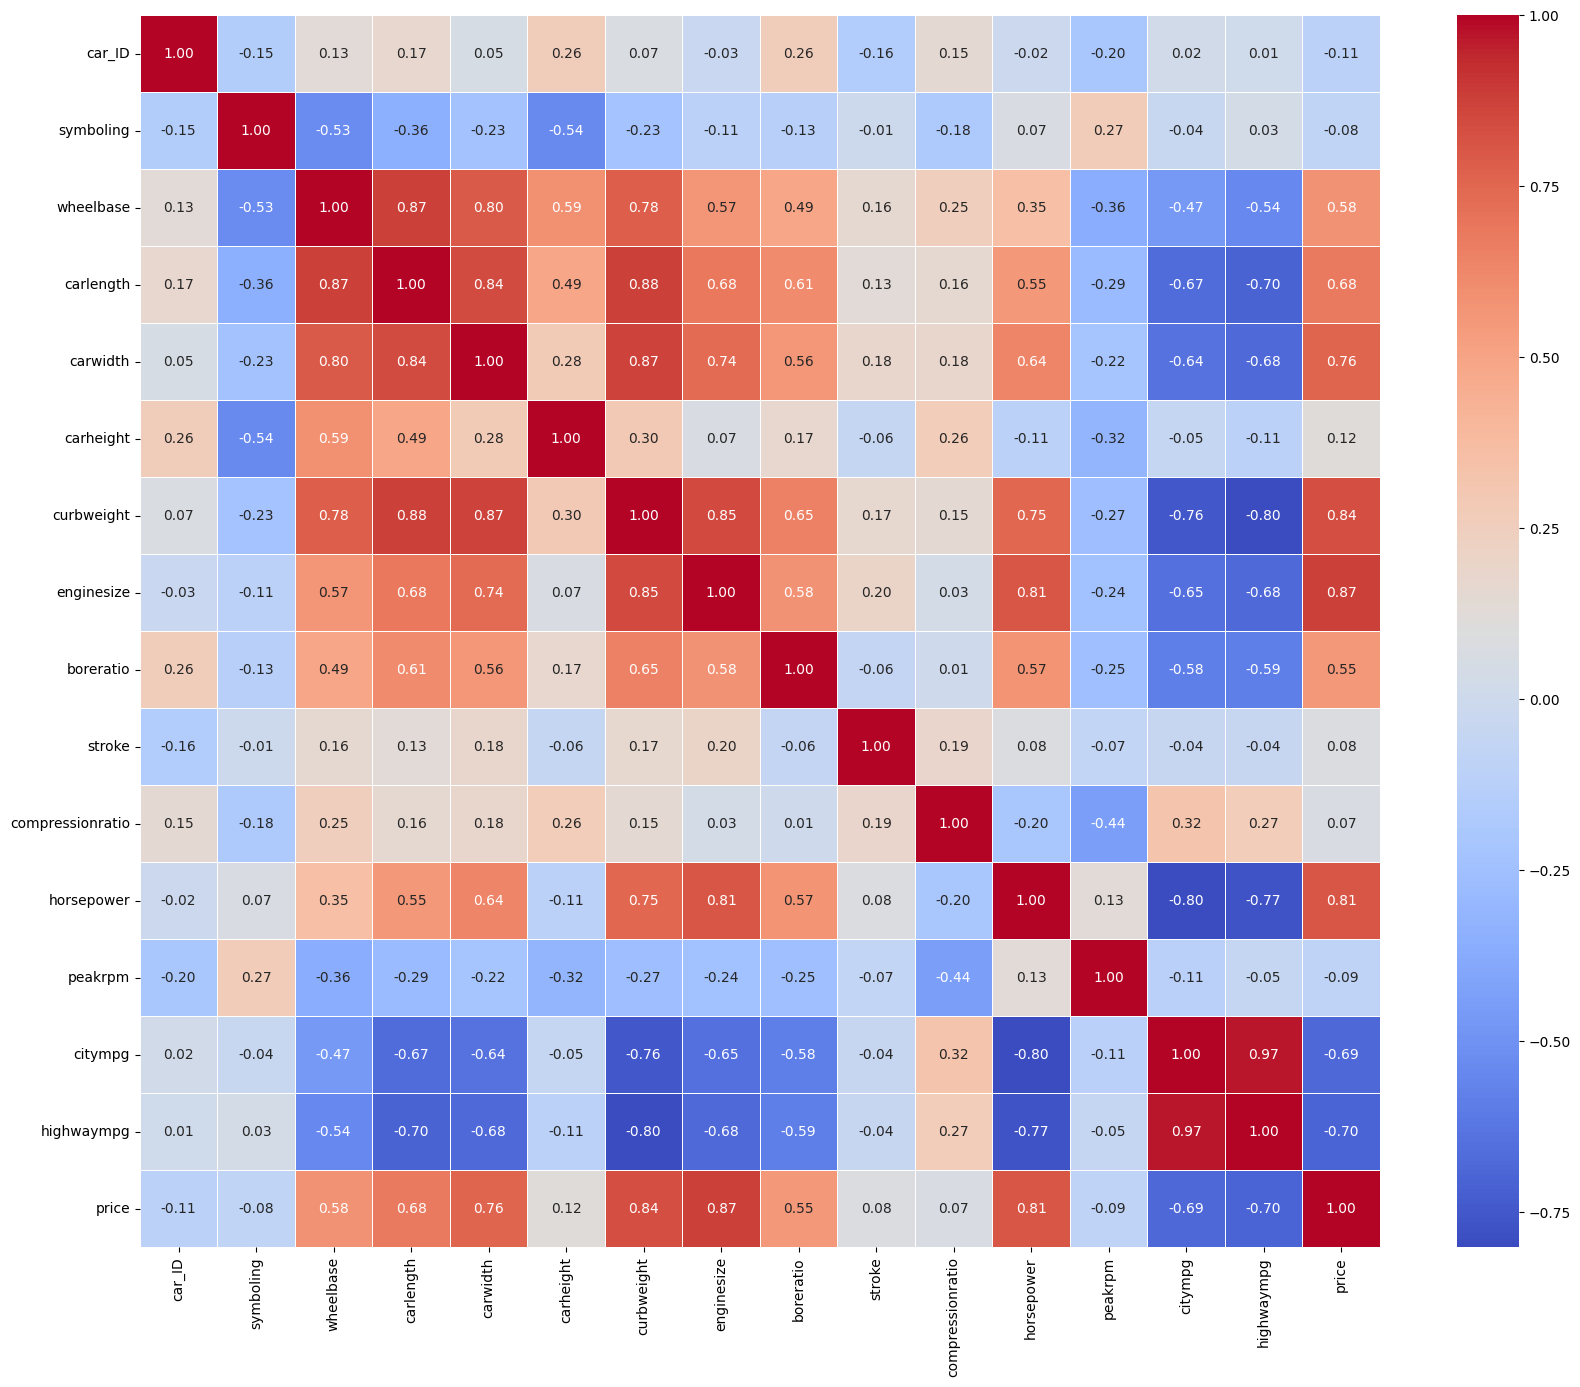

In [33]:
corr = numerics.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

In [34]:
low_corr = ['peakrpm', 'compressionratio', 'stroke', 'carheight', 'symboling', 'car_ID']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif_data = pd.DataFrame()
vif_data['feature'] = numerics.columns
vif_data['VIF'] = [variance_inflation_factor(numerics.values,i) for i in range(len(numerics.columns))]
print(vif_data)

             feature          VIF
0             car_ID     5.693734
1          symboling     2.544710
2          wheelbase  2297.939567
3          carlength  1957.760282
4           carwidth  2884.621004
5          carheight   939.236608
6         curbweight   408.755827
7         enginesize    93.046959
8          boreratio   309.657854
9             stroke   144.725241
10  compressionratio    17.704042
11        horsepower    70.446885
12           peakrpm   229.654356
13           citympg   446.051553
14        highwaympg   513.828091
15             price    26.239922


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerics)

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [39]:
eigenvalues = pca.explained_variance_

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

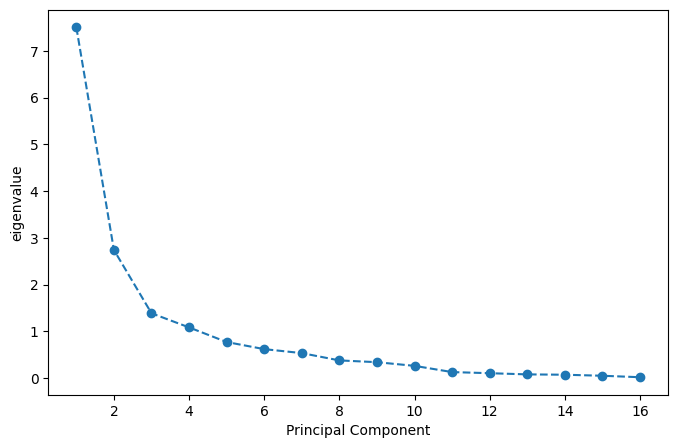

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1,len(eigenvalues)+ 1), eigenvalues, marker= 'o', linestyle = '--')
plt.xlabel('Principal Component')
plt.ylabel('eigenvalue')
plt.tight('Scree Plot')
plt.show()

In [41]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [42]:
X_combined = np.concatenate([X_pca, cat_var.values], axis=1)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
y = df['price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

In [46]:
model = LinearRegression()

In [47]:
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 2.739578966284573e-11
R-squared: 1.0


In [50]:
residuals = y_pred - y_test

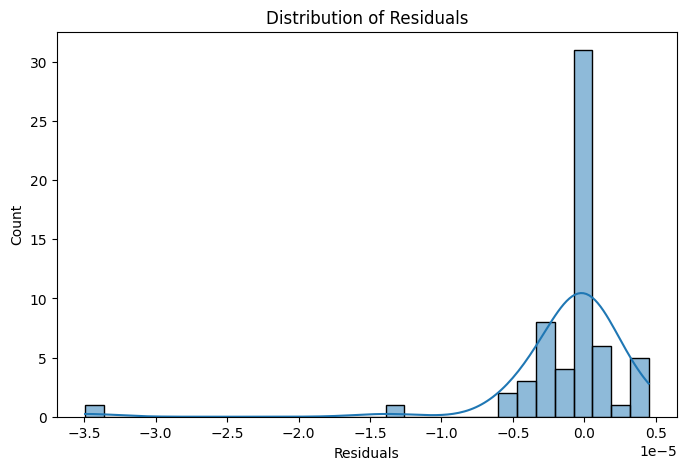

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()